In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
barun2104_telecom_churn_path = kagglehub.dataset_download('barun2104/telecom-churn')
nabihazahid_loan_prediction_dataset_2025_path = kagglehub.dataset_download('nabihazahid/loan-prediction-dataset-2025')
kmalit_bank_customer_churn_prediction_path = kagglehub.notebook_output_download('kmalit/bank-customer-churn-prediction')
anasahmad25_telco_customer_churn_data_analysis_path = kagglehub.notebook_output_download('anasahmad25/telco-customer-churn-data-analysis')
ybifoundation_telecom_customer_churn_prediction_path = kagglehub.notebook_output_download('ybifoundation/telecom-customer-churn-prediction')
uv09yuvraj_cutomer_churn_prediction_path = kagglehub.notebook_output_download('uv09yuvraj/cutomer-churn-prediction')

print('Data source import complete.')


100%|██████████| 45.5k/45.5k [00:00<00:00, 13.2MB/s]

Extracting files...


Using Colab cache for faster access to the 'loan-prediction-dataset-2025' dataset.
Extracting files...
Extracting files...
Extracting files...
Extracting files...
Data source import complete.


In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(f"{barun2104_telecom_churn_path}/telecom_churn.csv")

In [5]:
print(data.shape)
data.head(3)

(3333, 11)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


In [6]:
print("Total null values = ",data.isnull().sum().sum())
print("Total duplicated values = ",data.duplicated().sum())
# There are neither null or duplicated values present.

Total null values =  0
Total duplicated values =  0


In [7]:
X = data.drop('Churn',axis=1,)
y = data['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pre = xgb.predict(X_test)
acc = accuracy_score(pre,y_test)
acc

0.9256594724220624

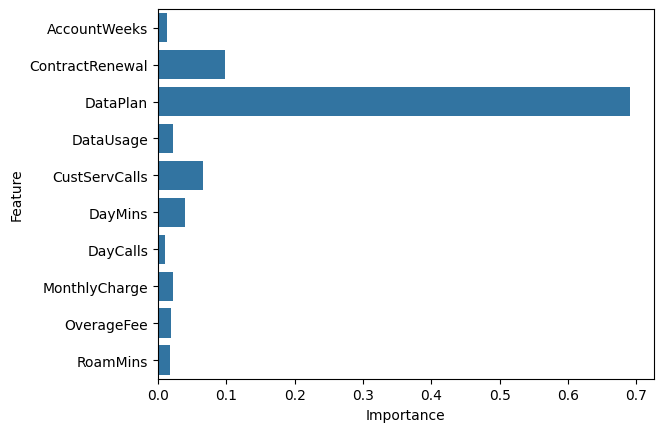

In [9]:
imp_feature = xgb.feature_importances_

df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": imp_feature
})

df.sort_values(by="Importance",ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=df["Importance"], y=df["Feature"])
plt.show()

In [ ]:
# so we can see column DataPlan is most important in determining whether the customer will churn or not